# Spotify: All Time Top 2000s Mega Dataset
Conjunt de dades sobre cançons d'Spotify. L'objectiu és predir la popularitat d'una cançó a partir de les seves característiques.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix

In [2]:
# A part de fer els split i replace per tractar amb les cançons que tenien comes al títol, hem hagut de tractar manualment algunes longituds de cançons llargues que apareixien com a 1,413 segons enlloc de 1413.

df_data = []
with open('dataset.txt', 'r') as file:
    for line in file:
        line = line.strip()
        line = line.replace('\'', '').replace('\\', '\'').replace('\'"', '"')

        data = line.split(',', 1)[1]
        n = data.count(',')
        data = data.replace(',', '', n - 13)
        data = data.split(',')
        df_data.append(data)

df = pd.DataFrame(df_data, columns=['Title', 'Artist', 'Genre', 'Year', 'BPM', 'Energy', 'Danceability', 'Loudness', 'Liveness', 'Valence', 'Length', 'Acousticness', 'Speechiness', 'Popularity'])
df.head()

,Title,Artist,Genre,Year,BPM,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


Pasamos la variables de codificadas como strings a numéricas:

In [3]:
for header in df.columns[3:10]:
    df[header] = df[header].astype(int)
for header in df.columns[11:]:
    df[header] = df[header].astype(int)
df['Length'] = df['Length'].astype(float)

## Visualización variables

In [4]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Title,1994,1959,Hallelujah,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Artist,1994,731,Queen,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genre,1994,149,album rock,413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,1994.0,NaN,NaN,NaN,1992.992979,16.116048,1956.0,1979.0,1993.0,2007.0,2019.0
BPM,1994.0,NaN,NaN,NaN,120.215647,28.028096,37.0,99.0,119.0,136.0,206.0
Energy,1994.0,NaN,NaN,NaN,59.679539,22.154322,3.0,42.0,61.0,78.0,100.0
Danceability,1994.0,NaN,NaN,NaN,53.238215,15.351507,10.0,43.0,53.0,64.0,96.0
Loudness,1994.0,NaN,NaN,NaN,-9.008526,3.647876,-27.0,-11.0,-8.0,-6.0,-2.0
Liveness,1994.0,NaN,NaN,NaN,19.012036,16.727378,2.0,9.0,12.0,23.0,99.0
Valence,1994.0,NaN,NaN,NaN,49.408726,24.858212,3.0,29.0,47.0,69.75,99.0


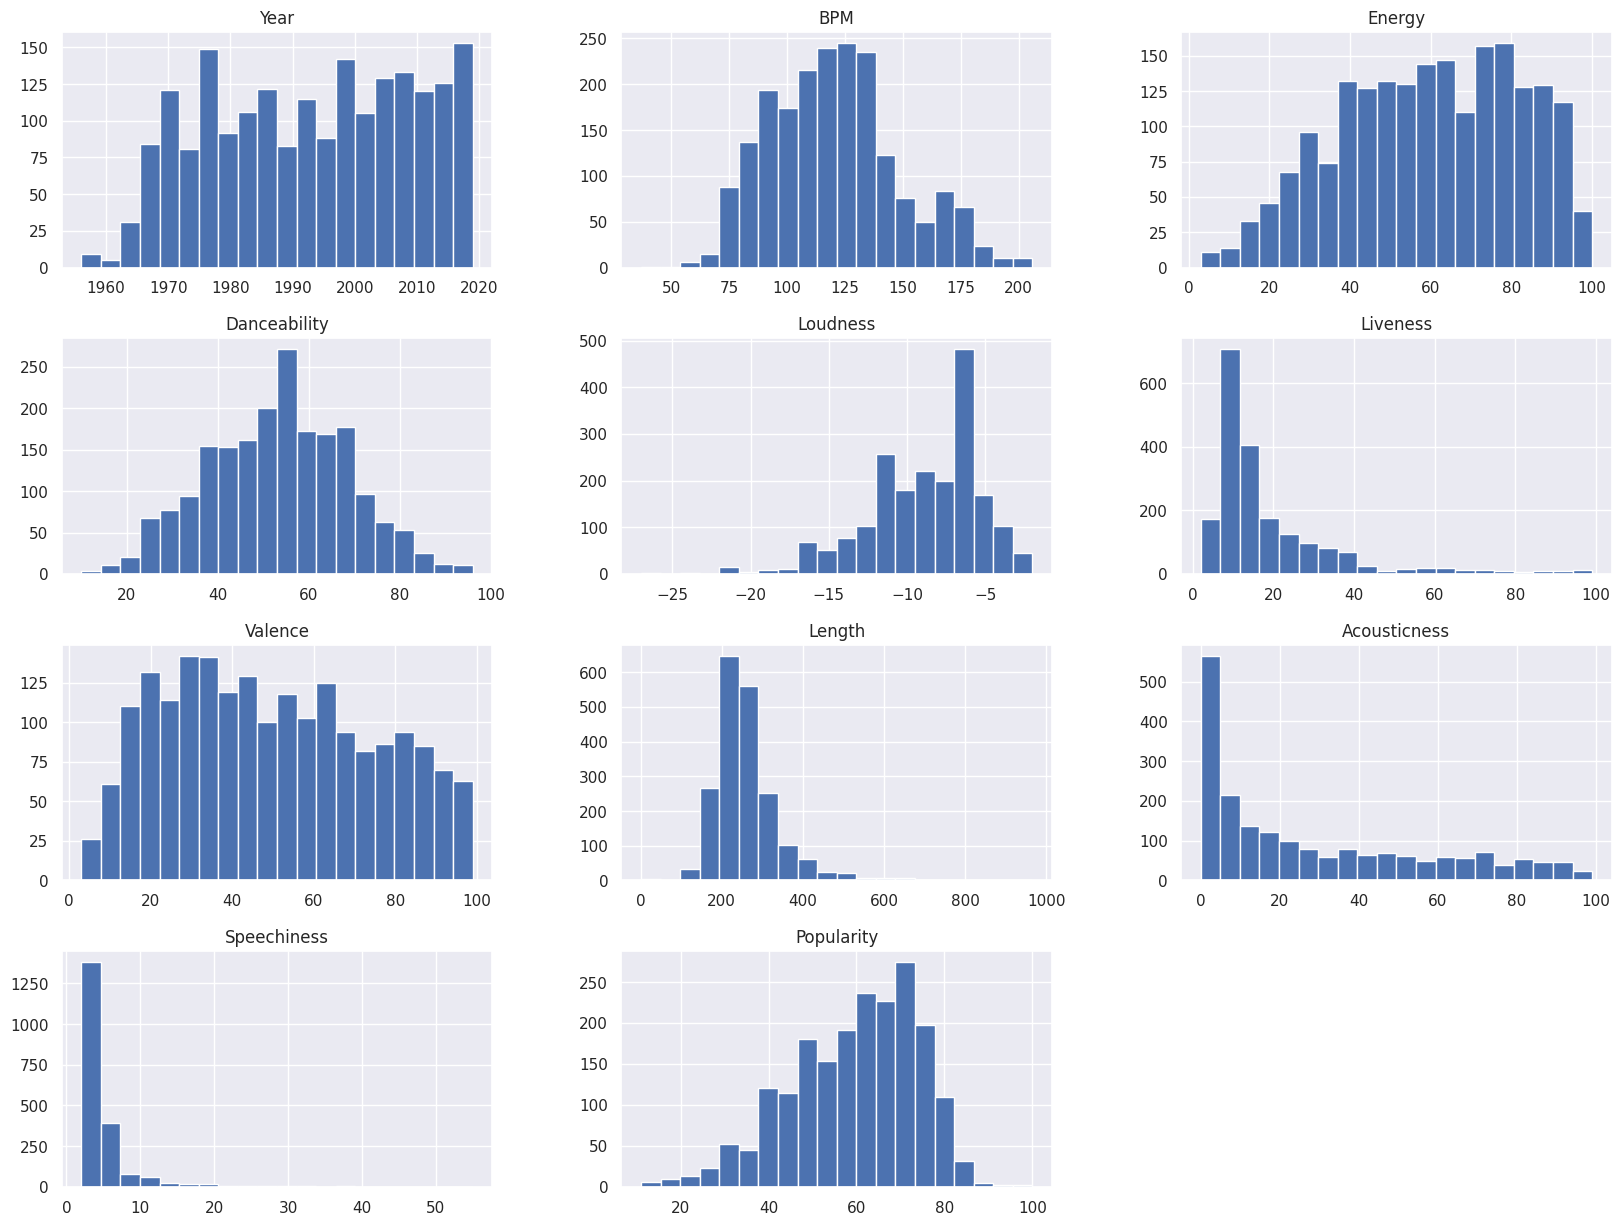

In [5]:
sns.set()
df.hist(bins=20, figsize=(20,15));

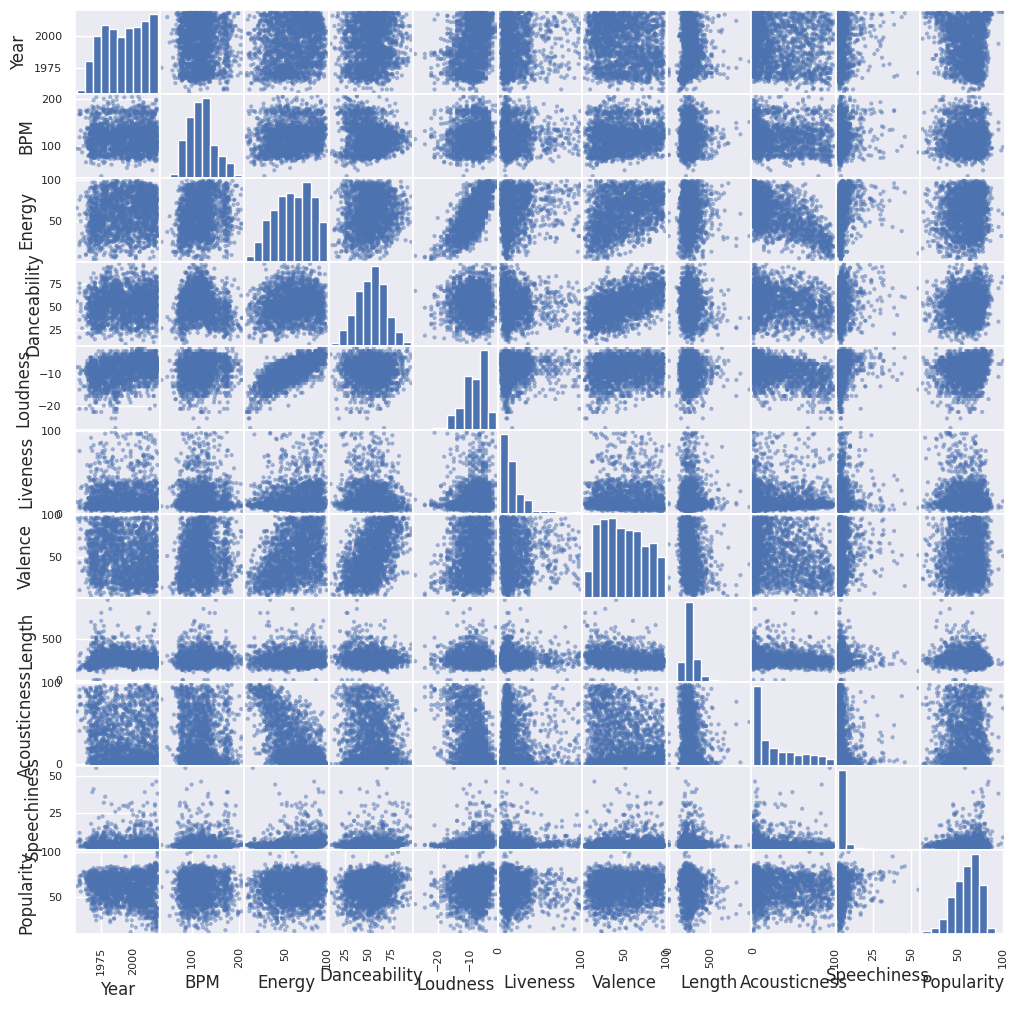

In [6]:
scatter_matrix(df, figsize=(12,12));

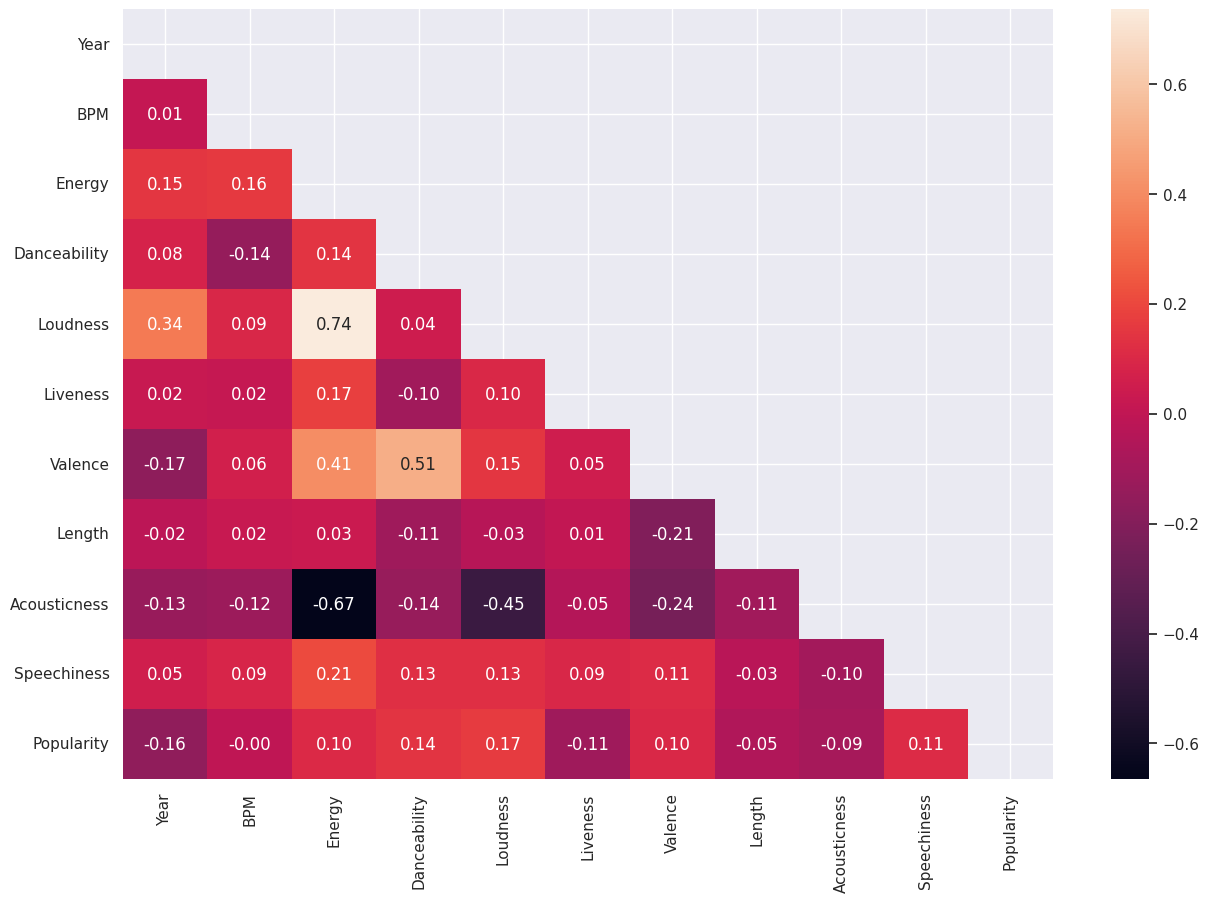

In [7]:
corr = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize = (15,10))
sns.heatmap(data = corr ,mask=mask, annot = True, fmt='.2f');

Veiem correlacions òbvies com que les cançons sorolloses tenen molta energia o que les acústiques en tenen poca. També com a curiositat veiem que com més recent és una cançó mes sorollosa sol ser. Per últim, veiem que no tenim gaire informació a la correlació amb la variable objectiu, amb valors que no superen 0.2 per cap variable.

In [10]:
df.isna().sum().sort_values(ascending=False)

Title           0
Artist          0
Genre           0
Year            0
BPM             0
Energy          0
Danceability    0
Loudness        0
Liveness        0
Valence         0
Length          0
Acousticness    0
Speechiness     0
Popularity      0
dtype: int64

In [11]:
df = df.drop(columns=['Title', 'Artist', 'Genre'])
df.head()

,Year,BPM,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,2004,157,30,53,-14,11,68,201.0,94,3,71
1,2000,135,79,50,-11,17,81,207.0,17,7,39
2,2001,168,69,66,-9,7,52,341.0,2,17,69
3,2007,173,96,43,-4,3,37,269.0,0,4,76
4,2002,106,82,58,-5,10,87,256.0,1,3,59


In [12]:
def encode_one_hot(dataframe):
    dataframe = dataframe.__deepcopy__()
    categoric_columns = [c for c in dataframe if dataframe[c].dtype.kind == 'O']

    for c in categoric_columns:
        dummies = pd.get_dummies(dataframe[c], drop_first=True, prefix=c, prefix_sep='_', dtype='int')

        dataframe = pd.concat([dataframe, dummies], axis=1)
        dataframe.drop(columns=[c], inplace=True)
    
    return dataframe

In [15]:
df = encode_one_hot(df)
df.head()

,Year,BPM,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,2004,157,30,53,-14,11,68,201.0,94,3,71
1,2000,135,79,50,-11,17,81,207.0,17,7,39
2,2001,168,69,66,-9,7,52,341.0,2,17,69
3,2007,173,96,43,-4,3,37,269.0,0,4,76
4,2002,106,82,58,-5,10,87,256.0,1,3,59


In [14]:
from sklearn.preprocessing import MinMaxScaler

def scaling_preprocessing(data, scaled_columns):
    data = data.__deepcopy__()
    data[scaled_columns] = MinMaxScaler().fit_transform(data[scaled_columns])
    return data

In [16]:
df = scaling_preprocessing(data=df, scaled_columns=['Year', 'BPM', 'Energy', 'Danceability', 'Loudness', 'Liveness', 'Valence', 'Length', 'Acousticness', 'Speechiness'])
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Year,1994.0,0.587190,0.255810,0.0,0.365079,0.587302,0.809524,1.0
BPM,1994.0,0.492400,0.165847,0.0,0.366864,0.485207,0.585799,1.0
Energy,1994.0,0.584325,0.228395,0.0,0.402062,0.597938,0.773196,1.0
Danceability,1994.0,0.502770,0.178506,0.0,0.383721,0.500000,0.627907,1.0
Loudness,1994.0,0.719659,0.145915,0.0,0.640000,0.760000,0.840000,1.0
Liveness,1994.0,0.175382,0.172447,0.0,0.072165,0.103093,0.216495,1.0
Valence,1994.0,0.483424,0.258940,0.0,0.270833,0.458333,0.695312,1.0
Length,1994.0,0.268138,0.084928,0.0,0.218555,0.252756,0.298358,1.0
Acousticness,1994.0,0.291496,0.293050,0.0,0.030303,0.181818,0.505051,1.0
Speechiness,1994.0,0.056509,0.083048,0.0,0.018868,0.037736,0.056604,1.0


In [26]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['Popularity']), df['Popularity'], test_size=0.3, random_state=0)

Un cop tenim les dades processades, provarem una regressió simple.

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lr = LinearRegression().fit(x_train, y_train)
lr_score = np.mean(cross_val_score(lr, x_train, y_train))
lr_score_test = np.mean(cross_val_score(lr, x_test, y_test))
y_test_predicted = lr.predict(x_test)
print("train", lr_score)
print("test", lr_score_test)
print("mean", (lr_score+lr_score_test)/2)

train 0.12545949154124073
test 0.06999944911528759
mean 0.09772947032826415
